# Setup

In [1]:
## data manipulation
import numpy as np
import pandas as pd

## spatial manipulation
import fiona
import geopandas as gpd

## visualization
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
## function to show values on bar plots
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()*1.02
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Data

## LA county parcel data

Source: https://hub.arcgis.com/datasets/lahub::la-county-parcels/data

In [4]:
file_loc = '/Volumes/GoogleDrive/My Drive/DS4A_Team_101/code/yha/raw_data/la_county_parcels/inglewood/LA_County_Parcels-shp'

inglewood_parcel = gpd.read_file(file_loc)

In [5]:
inglewood_parcel.head(3)

,OBJECTID,AIN,APN,SitusHouse,SitusFract,SitusDirec,SitusUnit,SitusStree,SitusAddre,SitusCity,SitusZIP,SitusFullA,TaxRateAre,TaxRateCit,AgencyClas,AgencyName,AgencyType,UseCode,UseCode_2,UseType,UseDescrip,DesignType,YearBuilt1,EffectiveY,Units1,Bedrooms1,Bathrooms1,SQFTmain1,DesignTy_1,YearBuilt2,Effectiv_1,Units2,Bedrooms2,Bathrooms2,SQFTmain2,DesignTy_2,YearBuilt3,Effectiv_2,Units3,Bedrooms3,Bathrooms3,SQFTmain3,DesignTy_3,YearBuilt4,Effectiv_3,Units4,Bedrooms4,Bathrooms4,SQFTmain4,DesignTy_4,YearBuilt5,Effectiv_4,Units5,Bedrooms5,Bathrooms5,SQFTmain5,Roll_Year,Roll_LandV,Roll_ImpVa,Roll_PersP,Roll_Fixtu,Roll_HomeO,Roll_RealE,Roll_Per_1,Roll_Fix_1,Roll_LandB,Roll_ImpBa,SpatialCha,ParcelCrea,ParcelType,Assr_Map,Assr_Index,QualityCla,QualityC_1,QualityC_2,QualityC_3,QualityC_4,LegalDescL,LegalDes_1,LegalDes_2,LegalDes_3,LegalDes_4,LegalDes_5,LegalDescr,CENTER_LAT,CENTER_LON,CENTER_X,CENTER_Y,LAT_LON,ShapeSTAre,ShapeSTLen,geometry
0,59,4018016024,4018-016-024,320,None,S,None,ASH AVE,320 S ASH AVE,INGLEWOOD CA,90301-1610,320 S ASH AVE INGLEWOOD CA 90301,04569,INGLEWOOD,NaN,None,None,0200,02,Residential,Two Units,0110,1930,1930,1.0,2.0,1.0,1084.0,0110,1950,1950,1.0,2.0,1.0,697.0,None,None,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,2020,162088.0,66180.0,0.0,0.0,7000.0,0.0,0.0,0.0,2002,2002,1970-01-01,0,0,4018-016,4018-NDX,D5C,D45B,None,None,None,TRACT # 943 W 45.81 FT OF S 140 FT OF,None,None,None,None,LOT 14,TRACT # 943 W 45.81 FT OF S 140 FT OF LOT 14,33.960045,-118.368022,6.450066e+06,1.808046e+06,"33.960045, -118.368022",6264.908203,369.527025,"POLYGON ((-118.36796 33.96024, -118.36796 33.9..."
1,60,4018017004,4018-017-004,340,None,S,None,ASH AVE,340 S ASH AVE,INGLEWOOD CA,90301-1647,340 S ASH AVE INGLEWOOD CA 90301,04569,INGLEWOOD,NaN,None,None,0100,01,Residential,Single,0110,1926,1926,1.0,2.0,1.0,748.0,None,None,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,2020,88193.0,39015.0,0.0,0.0,0.0,0.0,0.0,0.0,1982,1982,1970-01-01,0,0,4018-017,4018-NDX,D55A,None,None,None,None,TRACT # 943 S 40 FT OF LOTS 15 AND 16,AND W 14 FT OF S 40 FT OF,None,None,None,LOT 17,TRACT # 943 S 40 FT OF LOTS 15 AND 16 AND W 14...,33.959331,-118.367874,6.450110e+06,1.807786e+06,"33.959331, -118.367874",5154.627930,337.672565,"POLYGON ((-118.36796 33.95939, -118.36789 33.9..."
2,61,4018017006,4018-017-006,630,None,None,None,NECTARINE ST,630 NECTARINE ST,INGLEWOOD CA,90301-1614,630 NECTARINE ST INGLEWOOD CA 90301,04569,INGLEWOOD,NaN,None,None,0101,01,Residential,Single,0111,1926,1933,1.0,2.0,1.0,1152.0,None,None,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,2020,29564.0,45330.0,0.0,0.0,7000.0,0.0,0.0,0.0,1975,1975,1970-01-01,0,0,4018-017,4018-NDX,D55A,None,None,None,None,TRACT # 943 E 43 FT OF LOT 18 AND W 2 FT,None,None,None,None,OF S 62 FT OF LOT 19,TRACT # 943 E 43 FT OF LOT 18 AND W 2 FT OF S ...,33.959481,-118.367449,6.450239e+06,1.807840e+06,"33.959481, -118.367449",6576.900391,390.109234,"POLYGON ((-118.36739 33.95969, -118.36739 33.9..."


In [6]:
inglewood_parcel.columns

Index(['OBJECTID', 'AIN', 'APN', 'SitusHouse', 'SitusFract', 'SitusDirec',
       'SitusUnit', 'SitusStree', 'SitusAddre', 'SitusCity', 'SitusZIP',
       'SitusFullA', 'TaxRateAre', 'TaxRateCit', 'AgencyClas', 'AgencyName',
       'AgencyType', 'UseCode', 'UseCode_2', 'UseType', 'UseDescrip',
       'DesignType', 'YearBuilt1', 'EffectiveY', 'Units1', 'Bedrooms1',
       'Bathrooms1', 'SQFTmain1', 'DesignTy_1', 'YearBuilt2', 'Effectiv_1',
       'Units2', 'Bedrooms2', 'Bathrooms2', 'SQFTmain2', 'DesignTy_2',
       'YearBuilt3', 'Effectiv_2', 'Units3', 'Bedrooms3', 'Bathrooms3',
       'SQFTmain3', 'DesignTy_3', 'YearBuilt4', 'Effectiv_3', 'Units4',
       'Bedrooms4', 'Bathrooms4', 'SQFTmain4', 'DesignTy_4', 'YearBuilt5',
       'Effectiv_4', 'Units5', 'Bedrooms5', 'Bathrooms5', 'SQFTmain5',
       'Roll_Year', 'Roll_LandV', 'Roll_ImpVa', 'Roll_PersP', 'Roll_Fixtu',
       'Roll_HomeO', 'Roll_RealE', 'Roll_Per_1', 'Roll_Fix_1', 'Roll_LandB',
       'Roll_ImpBa', 'SpatialCha', 'ParcelC

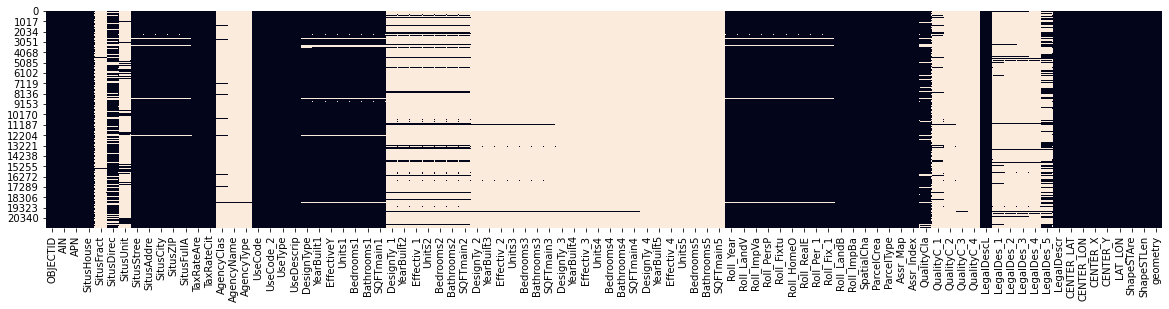

In [7]:
## checking missing values
fig, ax = plt.subplots(figsize=(20,4))
sns.despine()

fig = sns.heatmap(inglewood_parcel.isnull(), cbar=False)

plt.show()

**Observation**: There seems to be a repeating set of variables that correspond to building features; it corresponds to building augmentations throughout the years (confirmed by https://portal.assessor.lacounty.gov/parceldetail/4018016024). 

<AxesSubplot:>

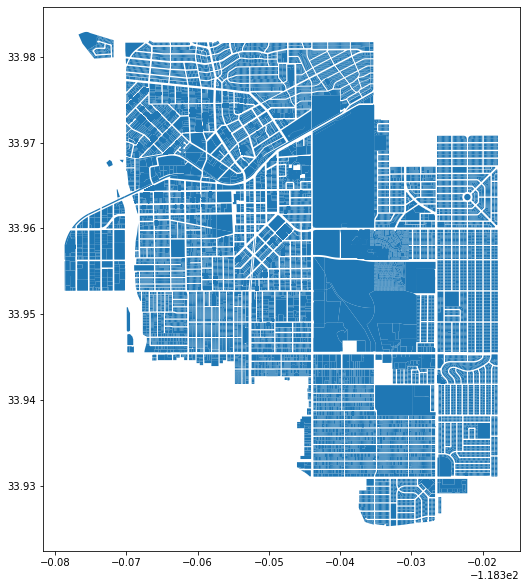

In [8]:
inglewood_parcel.plot(figsize=(10,10))

### number of parcels with building augementations over the years

In [12]:
len(inglewood_parcel[inglewood_parcel['YearBuilt2'].notnull()])/inglewood_parcel['AIN'].nunique()*100.0

12.115673040869892

**Observation**: Appx 12% of parcels have had building augmentations; need further investigation on how large the magnitude of change is.

### EDA with land use type

In [13]:
inglewood_parcel['UseType'].value_counts()

Residential      19256
Commercial        1403
Industrial         333
Institutional      152
Government         133
Miscellaneous       37
Recreational        24
Name: UseType, dtype: int64

In [14]:
inglewood_parcel['UseDescrip'].value_counts().head(10)

Single                                                      14620
Two Units                                                    1854
Five or more apartments                                      1388
Three Units (Any Combination)                                 761
Four Units (Any Combination)                                  621
Stores                                                        279
Store Combination                                             226
Parking Lots (Commercial Use Properties)                      201
Lgt Manf.Sm. EQPT. Manuf Sm.Shps Instr.Manuf. Prnt Plnts      191
Government Parcel                                             133
Name: UseDescrip, dtype: int64

In [77]:
zoned_percent_df = (inglewood_parcel.groupby('UseType')['ShapeSTAre'].sum()
                    .reset_index()
                    .rename(columns={'ShapeSTAre':'total_lot_area'})
                   )

In [78]:
zoned_percent_df['percent_city'] = zoned_percent_df['total_lot_area']*100.0/(zoned_percent_df['total_lot_area'].sum())

In [79]:
zoned_percent_df

,UseType,total_lot_area,percent_city
0,Commercial,2.431945e+07,7.434160
1,Government,2.468091e+07,7.544654
2,Industrial,1.067810e+07,3.264165
3,Institutional,1.712354e+07,5.234458
4,Miscellaneous,9.652036e+05,0.295051
5,Recreational,1.261414e+07,3.855989
6,Residential,2.367498e+08,72.371523


**Observation**: Appx 72% of the city, by square footage, is zoned for residential usage. The most common type of residential zoned is single-family home.

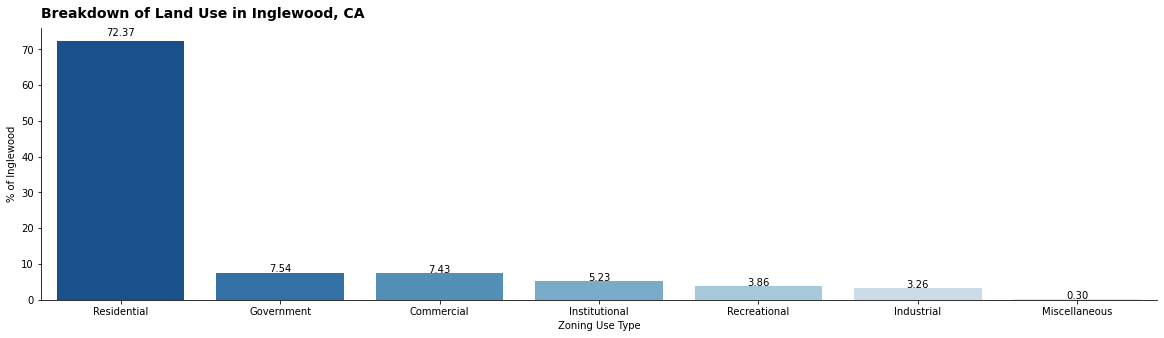

In [80]:
fig, ax = plt.subplots(figsize=(20,5))
sns.despine()

fig = sns.barplot(x='UseType', y='percent_city', data=zoned_percent_df.sort_values('percent_city', ascending=False), 
                  palette='Blues_r')
show_values_on_bars(ax)

## customizing axes
ax.set_title('Breakdown of Land Use in Inglewood, CA', loc='left', pad=10, fontdict={'fontsize':14, 'fontweight':'bold'})
ax.set_ylabel('% of Inglewood')
ax.set_xlabel('Zoning Use Type')

plt.show()

In [147]:
## creating smaller dataframe to join to others
inglewood_parcel_short = inglewood_parcel[['AIN', 'SitusFullA', 'UseType', 'UseDescrip', 'SQFTmain1', 
                                           'CENTER_LAT', 'CENTER_LON', 'CENTER_X', 'CENTER_Y', 
                                           'LAT_LON', 'ShapeSTAre', 'ShapeSTLen', 'geometry']]

## LA country urban tree canopy coverage

Source: https://data.lacounty.gov/Sustainability/Tree-Canopy-in-Urban-and-Non-Urban-LA-County-2014-/kf6c-hxgf

In [148]:
file_loc = '/Volumes/GoogleDrive/My Drive/DS4A_Team_101/code/yha/raw_data/tree_canopy_2014'

la_canopy = gpd.read_file(file_loc)

In [154]:
inglewood_canopy = la_canopy[la_canopy['commname'].str.lower().str.contains('inglewood')]

In [155]:
## creating smaller dataframe to join to others
inglewood_canopy_short = inglewood_canopy[['tc_id', 'can_a', 'can_p', 'grass_a', 'grass_p', 'shrub_a', 'shrub_p',
                                           'soil_a', 'soil_p', 'water_a', 'water_p', 'build_a', 'build_p',
                                           'road_a', 'road_p', 'paved_a', 'paved_p', 'total_a', 
                                           'shape_area', 'shape_leng', 'geometry']]

In [156]:
inglewood_canopy_short.head(3)

,tc_id,can_a,can_p,grass_a,grass_p,shrub_a,shrub_p,soil_a,soil_p,water_a,water_p,build_a,build_p,road_a,road_p,paved_a,paved_p,total_a,shape_area,shape_leng,geometry
101,29.0,826860.9375,14.758896,745087.5000,13.299297,0.0,0.0,8029.6875,0.143324,0.0,0.0,1.508062e+06,26.917873,1.009223e+06,18.013941,1505193.750,26.866668,5.602458e+06,5.601095e+06,10924.076762,"POLYGON ((-118.33511 33.96005, -118.33443 33.9..."
165,89.0,423632.8125,12.683890,598837.5000,17.929652,0.0,0.0,62760.9375,1.879110,0.0,0.0,7.903125e+05,23.662560,6.667312e+05,19.962443,797653.125,23.882344,3.339928e+06,3.335080e+06,14363.946014,"POLYGON ((-118.35846 33.98304, -118.35849 33.9..."
544,468.0,375398.4375,12.521401,475129.6875,15.847933,0.0,0.0,38250.0000,1.275827,0.0,0.0,8.521453e+05,28.423274,4.240406e+05,14.143859,833090.625,27.787706,2.998055e+06,2.998467e+06,7391.615337,"POLYGON ((-118.32641 33.93376, -118.32642 33.9..."


### checking data quality

#### checking individual elements, total percentage

In [157]:
var_interest = [i for i in inglewood_canopy_short.columns if '_p' in i]
var_interest

['can_p',
 'grass_p',
 'shrub_p',
 'soil_p',
 'water_p',
 'build_p',
 'road_p',
 'paved_p']

In [158]:
## checking that percentages of various elements add up to 100%
inglewood_canopy_short[var_interest].sum(axis=1).mean()

100.0

**<font color='green'>PASS**

## computing overlap between zoning data and tree canopy coverage

In [159]:
overlaid_df = gpd.overlay(inglewood_parcel_short, inglewood_canopy_short, how='intersection')

In [160]:
overlaid_df.head(3)

,AIN,SitusFullA,UseType,UseDescrip,SQFTmain1,CENTER_LAT,CENTER_LON,CENTER_X,CENTER_Y,LAT_LON,ShapeSTAre,ShapeSTLen,tc_id,can_a,can_p,grass_a,grass_p,shrub_a,shrub_p,soil_a,soil_p,water_a,water_p,build_a,build_p,road_a,road_p,paved_a,paved_p,total_a,shape_area,shape_leng,geometry
0,4018016024,320 S ASH AVE INGLEWOOD CA 90301,Residential,Two Units,1084.0,33.960045,-118.368022,6.450066e+06,1.808046e+06,"33.960045, -118.368022",6264.908203,369.527025,770.0,970382.8125,7.94593,718973.4375,5.887277,0.0,0.0,494296.875,4.047525,0.0,0.0,3.213577e+06,26.314208,2397009.375,19.627789,4.418086e+06,36.177271,12212325.0,1.221053e+07,14840.999507,"POLYGON ((-118.36796 33.96024, -118.36796 33.9..."
1,4018017004,340 S ASH AVE INGLEWOOD CA 90301,Residential,Single,748.0,33.959331,-118.367874,6.450110e+06,1.807786e+06,"33.959331, -118.367874",5154.627930,337.672565,770.0,970382.8125,7.94593,718973.4375,5.887277,0.0,0.0,494296.875,4.047525,0.0,0.0,3.213577e+06,26.314208,2397009.375,19.627789,4.418086e+06,36.177271,12212325.0,1.221053e+07,14840.999507,"POLYGON ((-118.36796 33.95939, -118.36789 33.9..."
2,4018017006,630 NECTARINE ST INGLEWOOD CA 90301,Residential,Single,1152.0,33.959481,-118.367449,6.450239e+06,1.807840e+06,"33.959481, -118.367449",6576.900391,390.109234,770.0,970382.8125,7.94593,718973.4375,5.887277,0.0,0.0,494296.875,4.047525,0.0,0.0,3.213577e+06,26.314208,2397009.375,19.627789,4.418086e+06,36.177271,12212325.0,1.221053e+07,14840.999507,"POLYGON ((-118.36739 33.95969, -118.36739 33.9..."


In [161]:
temp_df = overlaid_df.groupby(['tc_id', 'UseType']).agg({'ShapeSTAre':'sum'}).reset_index()

In [162]:
temp_df = temp_df.pivot_table(index=['tc_id'], columns='UseType', values='ShapeSTAre').reset_index()

In [163]:
var_interest = list(temp_df.columns)
var_interest.remove('tc_id')
var_interest

['Commercial',
 'Government',
 'Industrial',
 'Institutional',
 'Miscellaneous',
 'Recreational',
 'Residential']

In [164]:
## creating variable for total area of parcels
temp_df['total_area'] = temp_df[var_interest].sum(axis=1)

In [165]:
## creating variable for percent_residential
temp_df['percent_residential'] = temp_df['Residential']*100/temp_df['total_area']

In [166]:
temp_df.head(3)

UseType,tc_id,Commercial,Government,Industrial,Institutional,Miscellaneous,Recreational,Residential,total_area,percent_residential
0,29.0,NaN,NaN,NaN,16422.956055,NaN,1.261194e+06,4.487926e+07,4.615688e+07,97.232012
1,89.0,NaN,273275.251953,NaN,NaN,NaN,NaN,2.383199e+05,5.115951e+05,46.583686
2,468.0,380116.587891,20372.339844,NaN,69021.095703,NaN,NaN,1.831098e+06,2.300608e+06,79.591915


In [167]:
tent_df = inglewood_canopy_short.groupby('tc_id')['can_p'].mean().reset_index()

In [168]:
plot_df = pd.merge(temp_df[['tc_id', 'percent_residential']], tent_df)

In [169]:
plot_df.head(3)

,tc_id,percent_residential,can_p
0,29.0,97.232012,14.758896
1,89.0,46.583686,12.683890
2,468.0,79.591915,12.521401


In [170]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

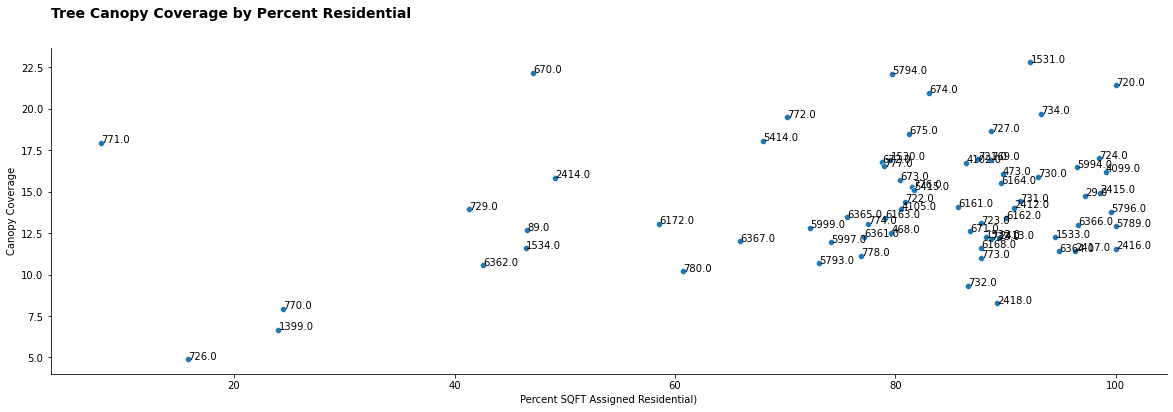

In [171]:
fig, ax = plt.subplots(figsize=(20,6))
sns.despine()

fig = sns.scatterplot(x='percent_residential', y='can_p', data=plot_df)

label_point(plot_df['percent_residential'], plot_df['can_p'], plot_df['tc_id'], plt.gca())

ax.set(xlabel='Percent SQFT Assigned Residential)', 
       ylabel='Canopy Coverage')
ax.set_title('Tree Canopy Coverage by Percent Residential', 
             loc='left', pad=30, fontdict={'fontsize':14, 'fontweight':'bold'})

plt.show()

**Observation**: `tc_id` 771 seems to be an outlier, where percent assigned residential has high canopy coverage.

<AxesSubplot:>

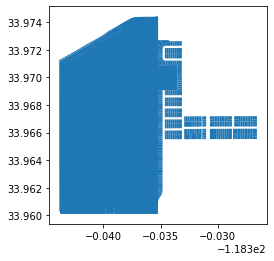

In [180]:
overlaid_df[(overlaid_df['tc_id'] == 771)].plot()

In [183]:
overlaid_df[(overlaid_df['tc_id'] == 771) & (overlaid_df['UseType'] != 'Residential')].head()

,AIN,SitusFullA,UseType,UseDescrip,SQFTmain1,CENTER_LAT,CENTER_LON,CENTER_X,CENTER_Y,LAT_LON,ShapeSTAre,ShapeSTLen,tc_id,can_a,can_p,grass_a,grass_p,shrub_a,shrub_p,soil_a,soil_p,water_a,water_p,build_a,build_p,road_a,road_p,paved_a,paved_p,total_a,shape_area,shape_leng,geometry
906,4011019018,8090 CRENSHAW BLVD INGLEWOOD CA 90305,Institutional,Institutional,6614.0,33.965892,-118.330389,6.461485e+06,1.810134e+06,"33.965892, -118.330389",4.839927e+04,893.789480,771.0,2.869805e+06,17.96824,8.674298e+06,54.310969,0.0,0.0,224831.25,1.407699,24918.75,0.15602,1.314295e+06,8.228983,1649981.25,10.330758,1.213411e+06,7.597332,1.597154e+07,1.596855e+07,20212.530052,"POLYGON ((-118.33011 33.96627, -118.33011 33.9..."
1023,4012021900,None,Institutional,"Cemeteries, Mausoleums, Mortuaries",4100.0,33.969967,-118.334370,6.460282e+06,1.811621e+06,"33.969967, -118.334370",3.372904e+05,2342.204828,771.0,2.869805e+06,17.96824,8.674298e+06,54.310969,0.0,0.0,224831.25,1.407699,24918.75,0.15602,1.314295e+06,8.228983,1649981.25,10.330758,1.213411e+06,7.597332,1.597154e+07,1.596855e+07,20212.530052,"POLYGON ((-118.33354 33.97074, -118.33354 33.9..."
1223,4012031018,3801 W MANCHESTER BLVD INGLEWOOD CA 90305,Institutional,"Cemeteries, Mausoleums, Mortuaries",12072.0,33.960329,-118.339415,6.458741e+06,1.808119e+06,"33.960329, -118.339415",3.935671e+04,813.819236,771.0,2.869805e+06,17.96824,8.674298e+06,54.310969,0.0,0.0,224831.25,1.407699,24918.75,0.15602,1.314295e+06,8.228983,1649981.25,10.330758,1.213411e+06,7.597332,1.597154e+07,1.596855e+07,20212.530052,"POLYGON ((-118.33902 33.96055, -118.33902 33.9..."
1224,4012031027,720 E FLORENCE AVE INGLEWOOD CA 90301,Institutional,"Cemeteries, Mausoleums, Mortuaries",2890.0,33.966630,-118.339143,6.458831e+06,1.810412e+06,"33.966630, -118.339143",1.175259e+07,15184.772112,771.0,2.869805e+06,17.96824,8.674298e+06,54.310969,0.0,0.0,224831.25,1.407699,24918.75,0.15602,1.314295e+06,8.228983,1649981.25,10.330758,1.213411e+06,7.597332,1.597154e+07,1.596855e+07,20212.530052,"POLYGON ((-118.33527 33.97437, -118.33527 33.9..."
1234,4012031930,None,Institutional,"Cemeteries, Mausoleums, Mortuaries",NaN,33.966950,-118.343352,6.457555e+06,1.810532e+06,"33.966950, -118.343352",5.105884e+05,10134.999035,771.0,2.869805e+06,17.96824,8.674298e+06,54.310969,0.0,0.0,224831.25,1.407699,24918.75,0.15602,1.314295e+06,8.228983,1649981.25,10.330758,1.213411e+06,7.597332,1.597154e+07,1.596855e+07,20212.530052,"POLYGON ((-118.34074 33.97223, -118.34223 33.9..."


<AxesSubplot:>

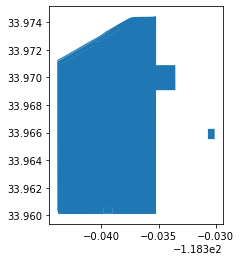

In [184]:
overlaid_df[(overlaid_df['tc_id'] == 771) & (overlaid_df['UseType'] != 'Residential')].plot()

**Observation**: confirmation of outlier, since this parcel has a park/cemetery.

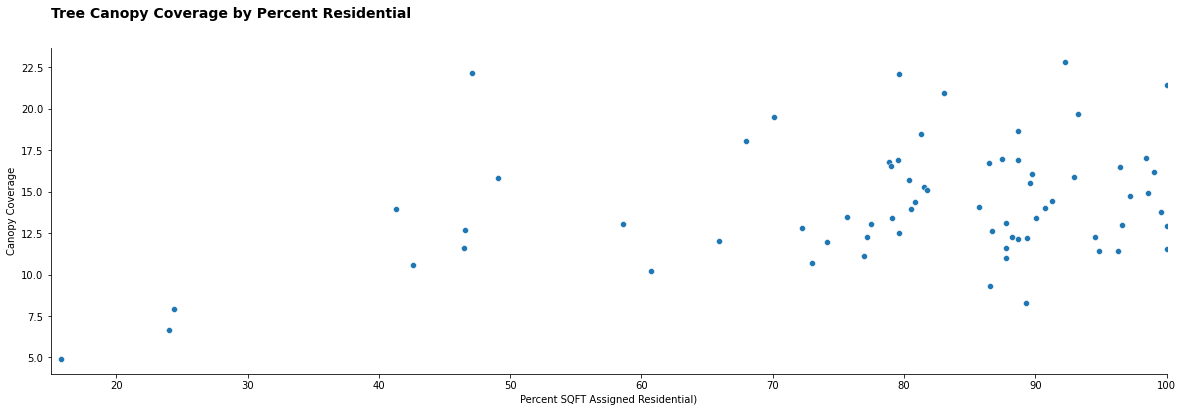

In [201]:
fig, ax = plt.subplots(figsize=(20,6))
sns.despine()

fig = sns.scatterplot(x='percent_residential', y='can_p', data=plot_df[plot_df['tc_id'] != 771])

ax.set(xlabel='Percent SQFT Assigned Residential)', ylabel='Canopy Coverage', xlim=(15, 100))
ax.set_title('Tree Canopy Coverage by Percent Residential', 
             loc='left', pad=30, fontdict={'fontsize':14, 'fontweight':'bold'})

plt.show()

**Interpretation**: Percent residential area within an area does not seem to be correlated with tree canopy coverage.

## environmental data

Link: https://oehha.ca.gov/calenviroscreen/maps-data/download-data

In [202]:
file_loc = '/Volumes/GoogleDrive/My Drive/DS4A_Team_101/code/yha/raw_data/calenviroscreen'

calenviro = gpd.read_file(file_loc)

In [203]:
calenviro.head(3)

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,ozone,ozoneP,pm,pmP,diesel,dieselP,drink,drinkP,pest,pestP,RSEIhaz,RSEIhazP,traffic,trafficP,cleanups,cleanupsP,gwthreats,gwthreatsP,haz,hazP,iwb,iwbP,swis,swisP,Pollution,PollutionS,PollutionP,asthma,asthmaP,lbw,lbwP,cvd,cvdP,edu,eduP,ling,lingP,pov,povP,unemp,unempP,housingB,housingBP,PopChar,PopCharSco,PopCharP,Children_u,Pop_11_64_,Elderly_ov,Hispanic_p,White_pct,African_Am,Native_Ame,Asian_Amer,Other_pct,OBJECTID_1,CIdecile,CIvigintil,Shape_Leng,Shape_Area,CES2018_Rn,geometry
0,6.083002e+09,3930,Santa Barbara,93454,Santa Maria,-120.427059,34.930669,29.51,59,0.035,17,4.51,2,16.79,51,284.33,30,3205.175,95,38.70,17,539.46,35,1.00,18,30.25,82,1.25,89,7,72,0.0,0,40.78,5.02,47,58.41,67,4.65,43,6.75,34,24.8,70,12.0,66,62.0,86,7.3,32,23.7,73,56.65,5.88,60,16.4,70.5,13.1,57.5,31.3,1.9,0.5,7.2,1.6,3507,6,12,6999.357622,2.847611e+06,55-60%,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,11406,Santa Barbara,93455,Santa Maria,-120.478083,34.928796,33.17,65,0.035,17,4.51,2,12.88,38,548.42,57,26775.744,99,40.94,17,370.37,18,14.70,76,199.10,99,5.03,97,8,76,10.0,89,52.91,6.52,79,36.71,37,4.16,30,3.42,2,46.0,92,16.9,79,56.7,81,10.6,61,21.4,65,49.08,5.09,49,20.6,73.2,6.2,74.0,17.4,1.4,0.2,5.5,1.6,2733,7,14,19100.578003,1.635292e+07,65-70%,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,2084,Santa Barbara,93454,Santa Maria,-120.426777,34.942111,22.85,45,0.035,17,4.51,2,14.36,44,284.33,30,2348.874,93,45.19,18,596.36,41,0.25,5,6.50,38,0.00,0,9,81,3.5,65,35.82,4.41,34,58.41,67,5.74,71,6.75,34,26.2,72,8.9,55,33.5,50,4.1,7,13.5,28,49.93,5.18,50,14.3,72.5,13.2,52.2,40.9,0.8,0.5,2.9,2.6,4689,5,9,4970.985933,1.352330e+06,40-45%,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."


In [208]:
calenviro.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - California
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [210]:
calenviro = calenviro.to_crs(crs='EPSG:4326')

## computing overlap between parcels, tree canopy, calenviroscreen

In [213]:
overlaid_df = gpd.overlay(overlaid_df, calenviro, how='intersection')

In [222]:
plot_df = overlaid_df.groupby('tract').agg({'can_p':'mean', 'pmP':'mean', 'ozoneP':'mean'})

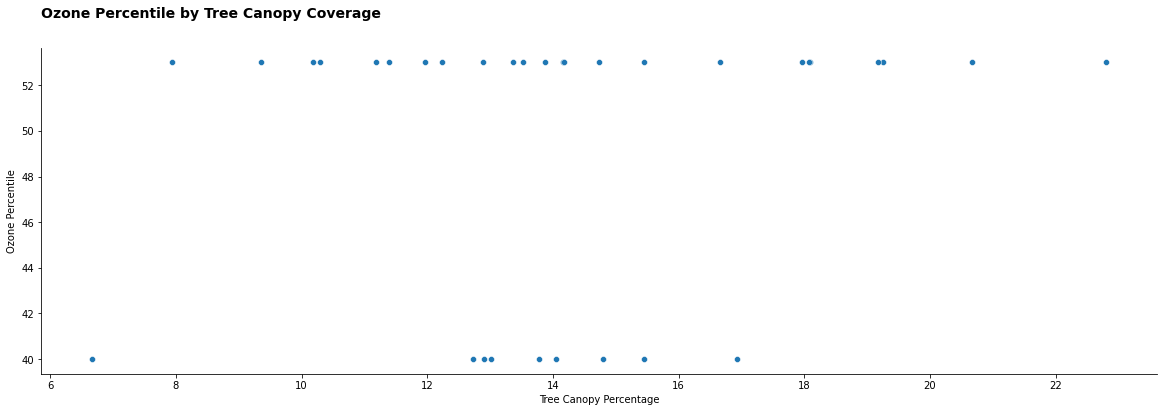

In [225]:
fig, ax = plt.subplots(figsize=(20,6))
sns.despine()

fig = sns.scatterplot(x='can_p', y='ozoneP', data=plot_df)

ax.set(xlabel='Tree Canopy Percentage', ylabel='Ozone Percentile')
ax.set_title('Ozone Percentile by Tree Canopy Coverage', 
             loc='left', pad=30, fontdict={'fontsize':14, 'fontweight':'bold'})

plt.show()

## locke holc canopy coverage data
**Link**: https://portal.edirepository.org/nis/metadataviewer?packageid=knb-lter-bes.5008.1

In [ ]:
file_loc = '/Volumes/GoogleDrive/My Drive/DS4A_Team_101/code/yha/raw_data/locke_holc/HOLC_gdbs/HOLC_LosAngeles/HOLC_LosAngeles_gdb.gdb'

## loading layers with fiona
fiona.listlayers(file_loc)

In [ ]:
locke_la = gpd.read_file(file_loc, driver='FileGDB', layer='HOLC_ply')

In [ ]:
## checking for basic information about data
locke_la.info()

In [ ]:
## checking head of data
locke_la.head()

In [ ]:
## computing centroid 
locke_la['centroid'] = locke_la['geometry'].centroid

In [ ]:
## creating points dataframe
locke_la_points = locke_la.copy()
locke_la_points.set_geometry("centroid", inplace = True)

In [ ]:
ax = locke_la.plot(figsize = (40, 40), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(locke_la_points.geometry.x, locke_la_points.geometry.y, locke_la_points['holc_id']):
    texts.append(plt.text(x, y, label, fontsize = 8))

In [ ]:
fig, ax = plt.subplots(figsize=(4,10))
sns.despine()

fig = sns.boxplot(x='holc_grade', y='Can_P', data=locke_la, palette='Greens_r', 
                  order=['A', 'B', 'C', 'D'])

## customizing axes
ax.set_title('Urban Tree Canopy Coverage in Los Angeles, by HOLC Ratings', loc='left', pad=10, fontdict={'fontsize':14, 'fontweight':'bold'})
ax.set_ylabel('% Tree Canopy Coverage')
ax.set_xlabel('HOLC Rating')

ax.set_ylim(0,70)

plt.show()

## redlining data
**Link**: https://dsl.richmond.edu/panorama/redlining/

In [ ]:
file_loc = '/Volumes/GoogleDrive/My Drive/DS4A_Team_101/code/yha/raw_data/redlining/calosangeles1939.geojson'

redlining_la = gpd.read_file(file_loc)

In [ ]:
redlining_la['name'].value_counts()

# Analysis

## boundaries

In [ ]:
inglewood_shape.crs

In [ ]:
locke_la.crs

In [ ]:
locke_la = locke_la.to_crs('EPSG:4326')

In [ ]:
inglewood_over = gpd.overlay(inglewood_shape, locke_la, how='intersection')

In [ ]:
## computing centroid 
inglewood_over['centroid'] = inglewood_over['geometry'].centroid

## creating points dataframe
inglewood_over_points = inglewood_over.copy()
inglewood_over_points.set_geometry("centroid", inplace = True)

In [ ]:
ax = inglewood_over.plot(column='Can_P', cmap='Greens', figsize=(20,20), linewidth = 0.5)
texts = []

for x, y, label in zip(inglewood_over_points.geometry.x, inglewood_over_points.geometry.y, 
                       inglewood_over_points['holc_grade']):
    texts.append(plt.text(x, y, label, fontsize = 8))

In [ ]:
data_overlaps=gpd.GeoDataFrame(crs=data_temp.crs)

for index, row in data_temp.iterrows():
    data_temp1=data_temp.loc[data_temp.id!=row.id,]
    # check if intersection occured
    overlaps=data_temp1[data_temp1.geometry.overlaps(row.geometry)]['id'].tolist()
    if len(overlaps)>0:
        temp_list=[]
        # compare the area with threshold
        for y in overlaps:
            temp_area=gpd.overlay(data_temp.loc[data_temp.id==y,],data_temp.loc[data_temp.id==row.id,],how='intersection')
            temp_area=temp_area.loc[temp_area.geometry.area>=9e-9]
            if temp_area.shape[0]>0:
                data_overlaps=gpd.GeoDataFrame(pd.concat([temp_area,data_overlaps],ignore_index=True),crs=data_temp.crs)

                # get unique of list id
data_overlaps['sorted']=data_overlaps.apply(lambda y: sorted([y['id_1'],y['id_2']]),axis=1)
data_overlaps['sorted']=data_overlaps.sorted.apply(lambda y: ''.join(y))
data_overlaps=data_overlaps.drop_duplicates('sorted')
data_overlaps=data_overlaps.reset_index()[['id_1','id_2','geometry']]

## Urban Tree Canopy Coverage 

In [ ]:
fig = locke_la.plot(column='Can_P', cmap='Greens', figsize=(20,20))

In [ ]:
ax = locke_la.plot(column='Can_P', cmap='Greens', figsize=(40,40), linewidth = 0.5)
texts = []

for x, y, label in zip(locke_la_points.geometry.x, locke_la_points.geometry.y, locke_la_points['holc_grade']):
    texts.append(plt.text(x, y, label, fontsize = 8))

### Urban Tree Canopy Coverage v. HOLC Rating

In [ ]:
fig, ax = plt.subplots(figsize=(4,8))
sns.despine()

fig = sns.boxplot(x='holc_grade', y='Can_P', data=locke_la, palette='Greens_r', 
                  order=['A', 'B', 'C', 'D'])

## customizing axes
ax.set_title('Urban Tree Canopy Coverage in Los Angeles, by HOLC Ratings', loc='left', pad=10, fontdict={'fontsize':14, 'fontweight':'bold'})
ax.set_ylabel('% Tree Canopy Coverage')
ax.set_xlabel('HOLC Rating')

ax.set_ylim(0,70)

plt.show()

In [ ]:
|